In [1]:
# for loading and preprocessing the data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# for training the model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble
#! pip3 install xgboost
from xgboost import XGBClassifier
#!pip3 install catboost
from catboost import CatBoostClassifier

# for evaluating classification model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,f1_score

# for data cleaning
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')

# for word2vec
#! pip3 install gensim
#! pip3 install konlpy
import gensim
from gensim.models import Word2Vec

# Comparing all machine learning algorithms
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import os

for dirname, _, filenames in os.walk('TFIDFInput'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.width',1000000)
pd.set_option('display.max_columns', 500)

score_df = pd.DataFrame(columns={'Model Description','Score'})
# Any results you write to the current directory are saved as output.

df_train = pd.read_csv("TFIDFInput/train.csv")
df_test = pd.read_csv("TFIDFInput/test.csv")

TFIDFInput/train_added.csv
TFIDFInput/train.csv
TFIDFInput/sample_submission.csv
TFIDFInput/test.csv


In [3]:
print(df_train.head(5))
print(df_train.info())

   id keyword location                                               text  target
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


In [4]:
print(df_train.isnull().any())

id          False
keyword      True
location     True
text        False
target      False
dtype: bool


In [5]:
print(df_test.isnull().any())

id          False
keyword      True
location     True
text        False
target      False
dtype: bool


In [6]:
print(df_train.shape)

(7613, 5)


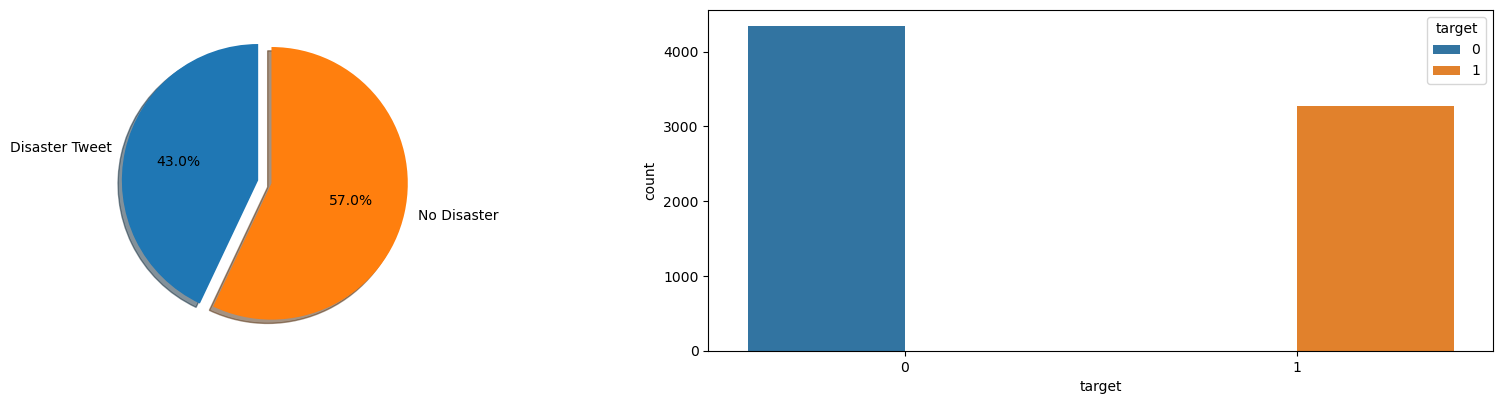

In [7]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

labels=['Disaster Tweet','No Disaster']
size=  [df_train['target'].mean()*100,abs(1-df_train['target'].mean())*100]
explode = (0, 0.1)
#ig1,ax1 = plt.subplots()
axes[0].pie(size,labels=labels,explode=explode,shadow=True,
            startangle=90,autopct='%1.1f%%')
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])
plt.show()

## Using Original data

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df_train['text'],df_train['target'])
vector = TfidfVectorizer().fit(X_train)

X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

# vector = CountVectorizer(max_features=2000)
# X = vector.fit_transform(df_train['text']).toarray()
# test_tmp = vector.transform(df_test['text']).toarray()

# X_train = X
# X_test = test_tmp
# y_train = df_train['target']
# y_test = df_test['target']

In [9]:
MLA = [
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),

    #Navies Bayes
    naive_bayes.BernoulliNB()
   # naive_bayes.GaussianNB()
    ]

In [10]:
# # train_embeddings = np.array(X_train)
# # test_embeddings = np.array(X_test)

# # Comparing all machine learning algorithms
# from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

# row_index = 0
# MLA_columns = []
# MLA_compare = pd.DataFrame(columns = MLA_columns)

# for alg in MLA:
#     predicted = alg.fit(X_train_vector.todense(), y_train).predict(X_test_vector.todense())

#     MLA_name = alg.__class__.__name__
#     MLA_compare.loc[row_index,'MLA used'] = MLA_name
# #     MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(train_embeddings,y_train), 4)
# #     MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(test_embeddings, y_test), 4)
    
    
# #     recall = recall_score(df_test['target'], predicted)
# #     precision = precision_score(df_test['target'], predicted)
# #     MLA_compare.loc[row_index, 'Precision'] = precision
# #     MLA_compare.loc[row_index, 'Recall'] = recall
# #     MLA_compare.loc[row_index, 'F1-score'] = round((2*precision*recall)/(precision+recall),4)
#     MLA_compare.loc[row_index, 'F1-score'] = f1_score(y_test,predicted)
#     MLA_compare.loc[row_index, 'AUC'] = roc_auc_score(y_test,predicted)

#     row_index+=1


In [11]:
# # f1-score 기준 정렬
# MLA_compare.sort_values(by = ['F1-score'], ascending = False, inplace = True)    
# MLA_compare

In [12]:
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"she'll", "she will", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"how's", "how is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"shouldn't", "should not", text)
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"   ", " ", text) # Remove any extra spaces
    return text


df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [13]:
def massage_text(text):
    import re
    from nltk.corpus import stopwords
    ## remove anything other then characters and put everything in lowercase
    tweet = re.sub("[^a-zA-Z]", ' ', text)
    tweet = tweet.lower()
    tweet = tweet.split()
    
    from nltk.stem import WordNetLemmatizer
    lem = WordNetLemmatizer()
    tweet = [lem.lemmatize(word) for word in tweet
             if word not in set(stopwords.words('english'))]
    tweet = ' '.join(tweet)
    return tweet
    print('--here goes nothing')
    print(text)
    print(tweet)

df_train['clean_text'] = df_train['text'].apply(massage_text)
df_test['clean_text'] = df_test['text'].apply(massage_text)


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/ec2-user/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/share/nltk_data'
    - '/home/ec2-user/anaconda3/envs/pytorch_p36/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [14]:
df_train.iloc[0:10][['text','clean_text']]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this #earthquake m...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby #alaska as ...
5,#RockyFire Update => California Hwy. 20 closed...,#rockyfire update => california hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...,#flood #disaster heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...,i am on top of the hill and i can see a fire i...
8,There's an emergency evacuation happening now ...,there is an emergency evacuation happening now...
9,I'm afraid that the tornado is coming to our a...,i am afraid that the tornado is coming to our ...


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_train['clean_text'], df_train['target'], random_state=20)

## Apply Tfidf tranformation
vector = TfidfVectorizer().fit(X_train)
X_train_vector = vector.transform(X_train)
X_test_vector  = vector.transform(X_test)


In [16]:
# Comparing all machine learning algorithms
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
row_index2 = 0
MLA_columns2 = []
MLA_compare2 = pd.DataFrame(columns = MLA_columns2)

for alg in MLA:
    predicted = alg.fit(X_train_vector.todense(), y_train).predict(X_test_vector.todense())

    MLA_name2 = alg.__class__.__name__
    MLA_compare2.loc[row_index2,'MLA used'] = MLA_name2
#     MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(train_embeddings,y_train), 4)
#     MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(test_embeddings, y_test), 4)
    
    
#     recall = recall_score(df_test['target'], predicted)
#     precision = precision_score(df_test['target'], predicted)
#     MLA_compare.loc[row_index, 'Precision'] = precision
#     MLA_compare.loc[row_index, 'Recall'] = recall
#     MLA_compare.loc[row_index, 'F1-score'] = round((2*precision*recall)/(precision+recall),4)
    MLA_compare2.loc[row_index2, 'F1-score'] = f1_score(y_test,predicted)
    MLA_compare2.loc[row_index2, 'AUC'] = roc_auc_score(y_test,predicted)

    row_index2+=1
    


In [17]:
# f1-score 기준 정렬
MLA_compare2.sort_values(by = ['F1-score'], ascending = False, inplace = True)    
MLA_compare2

,MLA used,F1-score,AUC
1,RidgeClassifierCV,0.758445,0.792266
2,SGDClassifier,0.758402,0.791828
3,BernoulliNB,0.714900,0.768304
0,RandomForestClassifier,0.689504,0.751359
